In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, CIRS, AltAz, EarthLocation, get_sun
import astropy.units as u
from astropy.time import Time

Ans. 1 - Yes, the RA and DEC of celistial objects changes with time, due to the Earth's precession. As the Earth wobbles on it's axis of rotation in approximately 26,000 years, the coordinate system shifts with time.

In [ ]:
RS_cygnus = SkyCoord(frame = 'icrs', ra = '19 59 28.3566', dec = '+40 44 2.096', unit = (u.hour, u.deg))        # J2000 Coordinates
RS_cygnus_new = RS_cygnus.transform_to(CIRS(obstime = '2026-01-15T00:00:00'))                                   # Transforming to Celestial Intermediate Reference System (CIRS)

In [4]:
print(f"Cygnus - A J2000 coordinates: RA - {RS_cygnus.ra.to_string(u.hour)}, DEC - {RS_cygnus.dec.to_string(u.deg)}")
print(f"Cygnus - A coordinates today: RA - {RS_cygnus_new.ra.to_string(u.hour)}, DEC - {RS_cygnus_new.dec.to_string(u.deg)}")

Cygnus - A J2000 coordinates: RA - 19h59m28.3566s, DEC - 40d44m02.096s
Cygnus - A coordinates today: RA - 19h59m00.21929566s, DEC - 40d48m16.11149479s


Ans. 2 - Cygnus - A, azimuth and elevation when observing from IIT Kanpur (26.5123° N, 80.2333° E).

In [ ]:
iit_kanpur = EarthLocation(lon = 80.232133, lat = 26.521421, height = 0)
RS_cygnus_altaz = RS_cygnus_new.transform_to(AltAz(location = iit_kanpur))              # Cygnus - A Elevation and Azimuth from IIT Kanpur

In [9]:
print(f"Cygnus - A from IIT Kanpur: Azimuth - {RS_cygnus_altaz.az.to_string(u.deg)}, Elevation - {RS_cygnus_altaz.alt.to_string(u.deg)}")

Cygnus - A from IIT Kanpur: Azimuth - 47d15m28.72539395s, Elevation - 6d25m56.39139794s


Ans. 3 - Change in azimuth and elevation of Cygnus - A as observed from IIT Kanpur.

In [ ]:
year = Time('2026-01-01T00:00:00', scale = 'utc') + (np.linspace(0, 365, 365) * u.day)
RS_cygnus_year = RS_cygnus.transform_to(CIRS(obstime = year))
RS_cygnus_altaz_year = RS_cygnus_year.transform_to(AltAz(location = iit_kanpur))                # Cygnus - A Elevation and Azimuth change throughout the year observed from IIT Kanpur

In [19]:
# Polar Coordinates
RS_az = RS_cygnus_altaz_year.az.rad
RS_alt = 90 - RS_cygnus_altaz_year.alt.deg

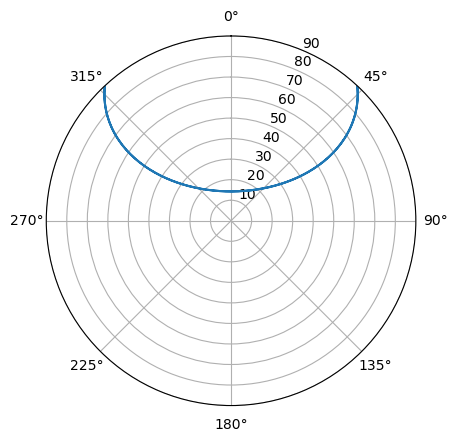

In [24]:
plt.figure()
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlim(0, 90)
ax.plot(RS_az, RS_alt, '-', markersize=3)
plt.show()

Ans. 4 - The Sun's RA and DEC over a year.

In [20]:
Sun = get_sun(year)
Sun_altaz_year = Sun.transform_to(AltAz(location = iit_kanpur))

In [21]:
# Polar coordinates of Sun
S_az = Sun_altaz_year.az.rad
S_alt = 90 - Sun_altaz_year.alt.deg

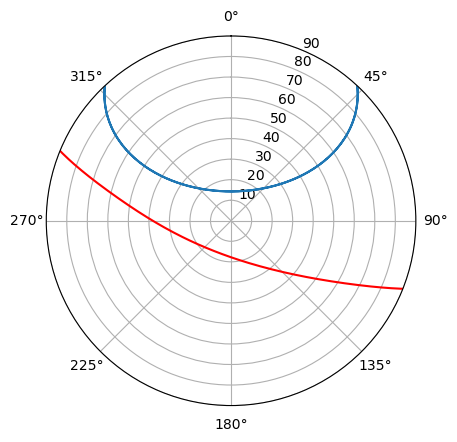

In [39]:
plt.figure()
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlim(0, 90)
ax.plot(S_az, S_alt, '-r', markersize=3)
ax.plot(RS_az, RS_alt, '-', markersize=3)
plt.show()

In [37]:
RS_cygnus_ra = np.full(len(year), RS_cygnus.ra.deg)
RS_cygnus_dec = np.full(len(year), RS_cygnus.dec.deg)

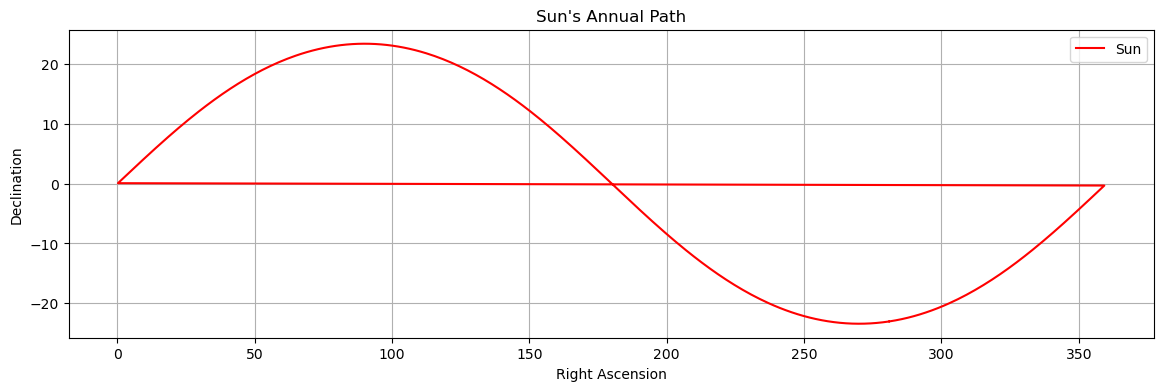

In [40]:
plt.figure(figsize=(14,4))
plt.plot(Sun.ra.deg, Sun.dec.deg, '-r', label = 'Sun')
plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("Sun's Annual Path")
plt.legend()
plt.grid(True)
plt.show()